In [1]:
import numpy as np
import pandas as pd
import os
import librosa 
from scipy.io import wavfile as wav
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
import sklearn


2023-01-16 17:54:43.560618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 17:54:43.669179: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-16 17:54:44.200953: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2023-01-16 17:54:44.201018: W tensorflow/compiler/xla/strea

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2023-01-16 17:54:49.264485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 17:54:49.269750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 17:54:49.270204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 17:54:49.271098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [3]:
sound_bad = '../record/안좋아요_1.wav'

In [4]:
example_list = [sound_bad]#, filename_laugh, filename_noise, filename_silence, filename_fall]
librosa_sample_rate  = 0

In [5]:
def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title(filename)
    librosa.display.waveshow(data, sr = librosa_sample_rate)

/home/in/venv/dlproject/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/in/venv/dlproject/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/in/venv/dlproject/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/in/venv/dlproject/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/in/venv/dlproject/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  func(*args, **kwargs)
/home/in/venv/dlproject/lib/python3.8/site-packages/IPython/core/events.py:89: UserW

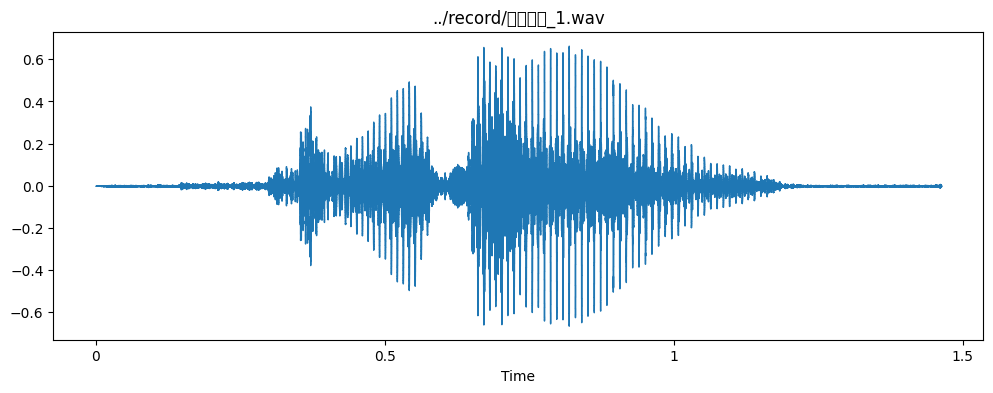

In [6]:
for i in  example_list:
    draw_sound(i)

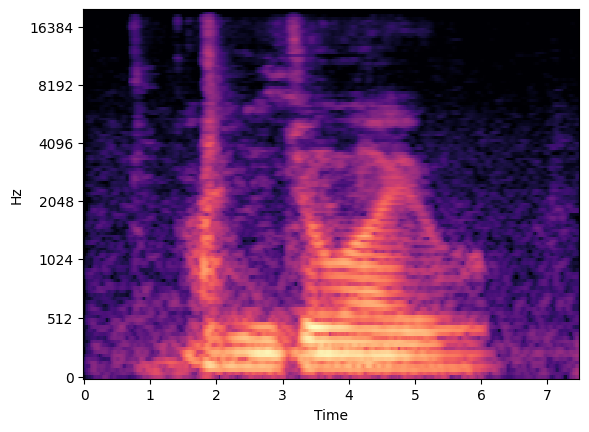

: 

: 

In [ ]:
y, sr = librosa.load(sound_bad)
yt, _ = librosa.effects.trim(y)
y = yt
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')

In [7]:
from scipy.io import wavfile as wav

filename = '../record/안좋아요_1.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

Original sample rate: 44100
Librosa sample rate: 22050
(40, 64)


Text(0, 0.5, 'MFCC coeff')

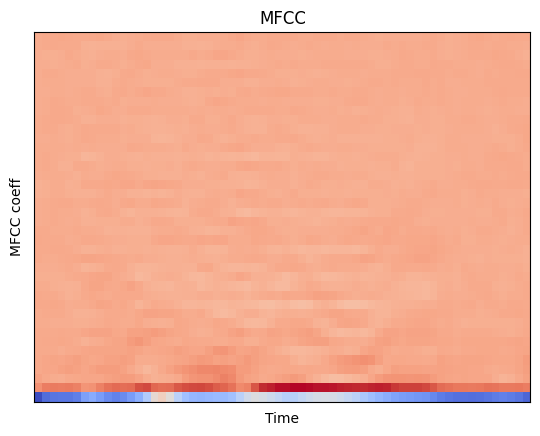

In [8]:
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=librosa_sample_rate)
plt.xlabel('Time')
plt.ylabel('MFCC coeff')

In [9]:
train_path = os.listdir('../record/')
train_path

['안좋아요_8.wav',
 '안좋아요_7.wav',
 '아_8.wav',
 '좋아요_10.wav',
 '아_1.wav',
 '안좋아요_1.wav',
 '좋아요_8.wav',
 '좋아요_3.wav',
 '아_9.wav',
 '안좋아요_9.wav',
 '아_7.wav',
 '아_4.wav',
 '좋아요_7.wav',
 '안좋아요_2.wav',
 '안좋아요_4.wav',
 '좋아요_5.wav',
 '좋아요_1.wav',
 '아_5.wav',
 '좋아요_4.wav',
 '안좋아요_3.wav',
 '안좋아요_6.wav',
 '아_2.wav',
 '아_10.wav',
 '좋아요_2.wav',
 '좋아요_9.wav',
 '안좋아요_5.wav',
 '아_6.wav',
 '좋아요_6.wav',
 '아_3.wav']

In [10]:
wav_dict = {'아' : 0,
            '좋아요' : 1,
            '안좋아요' : 2}

In [11]:
wav_files = []

for file in os.listdir(f'../record/'):
    wav_files.append(f'../record/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[0])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,../record/안좋아요_8.wav,안좋아요
1,../record/안좋아요_7.wav,안좋아요
2,../record/아_8.wav,아
3,../record/좋아요_10.wav,좋아요
4,../record/아_1.wav,아
5,../record/안좋아요_1.wav,안좋아요
6,../record/좋아요_8.wav,좋아요
7,../record/좋아요_3.wav,좋아요
8,../record/아_9.wav,아
9,../record/안좋아요_9.wav,안좋아요


In [12]:
wav_df['label']

0     안좋아요
1     안좋아요
2        아
3      좋아요
4        아
5     안좋아요
6      좋아요
7      좋아요
8        아
9     안좋아요
10       아
11       아
12     좋아요
13    안좋아요
14    안좋아요
15     좋아요
16     좋아요
17       아
18     좋아요
19    안좋아요
20    안좋아요
21       아
22       아
23     좋아요
24     좋아요
25    안좋아요
26       아
27     좋아요
28       아
Name: label, dtype: object

In [40]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,../record/안좋아요_8.wav,안좋아요,2
1,../record/안좋아요_7.wav,안좋아요,2
2,../record/아_8.wav,아,0
3,../record/좋아요_10.wav,좋아요,1
4,../record/아_1.wav,아,0
5,../record/안좋아요_1.wav,안좋아요,2
6,../record/좋아요_8.wav,좋아요,1
7,../record/좋아요_3.wav,좋아요,1
8,../record/아_9.wav,아,0
9,../record/안좋아요_9.wav,안좋아요,2


In [41]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(wav_df,
                                        test_size=0.2,
                                        random_state=7)

In [42]:
X_train = train_data['path']
y_train = train_data['class_label']

In [43]:
X_val = val_data['path']
y_val = val_data['class_label']

In [44]:
max_pad_len = 237

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None
    
#     return padded_mfccs
    return mfccs

In [45]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = extract_feature(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

file name : ../record/좋아요_4.wav
(40, 237)
file name : ../record/좋아요_2.wav
(40, 237)
file name : ../record/좋아요_9.wav
(40, 237)
file name : ../record/아_3.wav
(40, 237)
file name : ../record/좋아요_7.wav
(40, 237)
file name : ../record/안좋아요_2.wav
(40, 237)
file name : ../record/좋아요_1.wav
(40, 237)
file name : ../record/안좋아요_8.wav
(40, 237)
file name : ../record/좋아요_6.wav
(40, 237)
file name : ../record/좋아요_8.wav
(40, 237)
file name : ../record/아_6.wav
(40, 237)
file name : ../record/안좋아요_6.wav
(40, 237)
file name : ../record/아_7.wav
(40, 237)
file name : ../record/아_2.wav
(40, 237)
file name : ../record/아_9.wav
(40, 237)
file name : ../record/안좋아요_4.wav
(40, 237)
file name : ../record/좋아요_3.wav
(40, 237)
file name : ../record/안좋아요_3.wav
(40, 237)
file name : ../record/좋아요_10.wav
(40, 237)
file name : ../record/아_10.wav
(40, 237)
file name : ../record/안좋아요_5.wav
(40, 237)
file name : ../record/아_1.wav
(40, 237)
file name : ../record/좋아요_5.wav
(40, 237)


In [46]:
features_df 

,feature,class_label
0,"[[-540.7936, -489.21915, -479.6517, -481.2116,...",1
1,"[[-568.75464, -523.9471, -520.8903, -520.37756...",1
2,"[[-556.4879, -506.64972, -497.8446, -496.55014...",1
3,"[[-485.30002, -418.4952, -416.00104, -426.3817...",0
4,"[[-477.87677, -413.15985, -397.40048, -404.013...",1
5,"[[-577.6417, -519.42303, -505.8301, -505.42984...",2
6,"[[-482.77377, -409.28198, -389.462, -381.92258...",1
7,"[[-512.1137, -445.9496, -439.9372, -452.9761, ...",2
8,"[[-419.9136, -394.33707, -412.7922, -351.9266,...",1
9,"[[-509.3172, -420.74713, -322.37735, -289.6923...",1


In [47]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = extract_feature(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

file name : ../record/아_8.wav
(40, 237)
file name : ../record/아_5.wav
(40, 237)
file name : ../record/안좋아요_7.wav
(40, 237)
file name : ../record/안좋아요_9.wav
(40, 237)
file name : ../record/아_4.wav
(40, 237)
file name : ../record/안좋아요_1.wav
(40, 237)


In [48]:
features_val_df

,feature,class_label
0,"[[-436.5881, -379.96664, -367.61688, -371.3034...",0
1,"[[-413.6028, -340.14145, -328.6435, -340.5701,...",0
2,"[[-545.9949, -478.34296, -461.32227, -471.387,...",2
3,"[[-557.3922, -499.80072, -491.6517, -495.9604,...",2
4,"[[-446.5067, -391.19534, -393.22766, -401.5825...",0
5,"[[-533.61957, -476.38284, -461.3894, -457.9828...",2


In [49]:
np.array(features_df.feature.tolist()).shape

(23, 40, 237)

In [50]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [51]:
X_train.shape

(23, 40, 237)

In [52]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [53]:
X_val.shape

(6, 40, 237)

In [56]:
num_rows = 40
num_columns = 237
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_val = X_val.reshape(X_val.shape[0], num_rows, num_columns, num_channels)

In [57]:
X_train.shape

(23, 40, 237, 1)

In [58]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [59]:
### ReduceLROnPlateau 콜백

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.000000001
)

In [60]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    mode = 'max'
)

In [61]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor = 'val_accuracy',
    filepath = 'mfcc_.{epoch:02d}-{val_accuracy:.6f}.hdf5',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True
)

In [62]:
#CNN모델 구현
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, input_shape = (num_rows, num_columns, num_channels), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 235, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 117, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 117, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 115, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 57, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 57, 64)         0

In [63]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [89]:
history = model.fit(X_train,
                 y_train,
                 epochs=200,
                 verbose=1,
                 validation_data=(X_val, y_val)
                )#callbacks = [reduce_lr, early_stopping, checkpoint])

Epoch 1/200
1/1 [==============================] - 0s 56ms/step - loss: 7.4745e-04 - accuracy: 1.0000 - val_loss: 1.2057 - val_accuracy: 0.8333
Epoch 2/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.1247 - val_accuracy: 0.8333
Epoch 3/200
1/1 [==============================] - 0s 33ms/step - loss: 7.9063e-04 - accuracy: 1.0000 - val_loss: 1.0648 - val_accuracy: 0.8333
Epoch 4/200
1/1 [==============================] - 0s 32ms/step - loss: 0.0758 - accuracy: 0.9565 - val_loss: 1.1471 - val_accuracy: 0.8333
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2382 - val_accuracy: 0.8333
Epoch 6/200
1/1 [==============================] - 0s 30ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.3497 - val_accuracy: 0.8333
Epoch 7/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.5127 - val_accuracy: 0.8333
Epoch 8/200


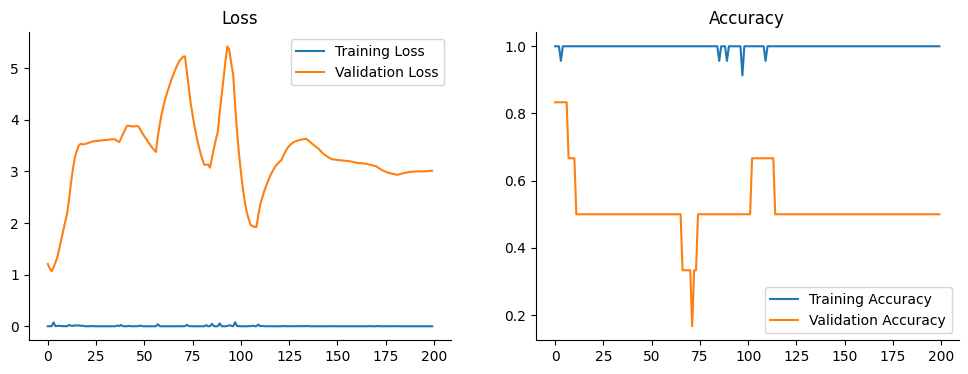

In [90]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = 'Training Loss')

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['val_loss'], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['accuracy'], ax = axes[1],
             label = 'Training Accuracy')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['val_accuracy'], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title('Loss')
axes[1].set_title('Accuracy')

sns.despine()
plt.show()

In [72]:
def predict_features(file_name):
    max_ped_len = 237
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_ped_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    mfccs = mfccs.reshape(1, 40, 237, 1)
    
    return mfccs

In [77]:
np.argmax(model.predict(predict_features('../record/아_2.wav')))

1/1 [==============================] - 0s 28ms/step


0

In [82]:
val_data

,path,label,class_label
2,../record/아_8.wav,아,0
17,../record/아_5.wav,아,0
1,../record/안좋아요_7.wav,안좋아요,2
9,../record/안좋아요_9.wav,안좋아요,2
11,../record/아_4.wav,아,0
5,../record/안좋아요_1.wav,안좋아요,2


In [ ]:
np.argmax(model.predict(predict_features('../record/아_2.wav')))

In [87]:
val_data['path']

2        ../record/아_8.wav
17       ../record/아_5.wav
1     ../record/안좋아요_7.wav
9     ../record/안좋아요_9.wav
11       ../record/아_4.wav
5     ../record/안좋아요_1.wav
Name: path, dtype: object

In [88]:
for data in val_data['path']:
    print('predict :', np.argmax(model.predict(predict_features(data))), \n
          'real :',  )

    # print(y_val[i])
    print('----------------')

1/1 [==============================] - 0s 20ms/step
1
----------------
1/1 [==============================] - 0s 26ms/step
0
----------------
1/1 [==============================] - 0s 19ms/step
2
----------------
1/1 [==============================] - 0s 24ms/step
2
----------------
1/1 [==============================] - 0s 20ms/step
0
----------------
1/1 [==============================] - 0s 27ms/step
2
----------------


In [ ]:
val_errors = val_data[(y_val) != (val_data.val_pred)].reset_index(
    drop = True)
val_errors